<a href="https://colab.research.google.com/github/jittakorn-ch/multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [ ]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [ ]:
Name = 'จิตรกร จันทะสี'
ID = '623021044-1'

In [ ]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [ ]:
Data = DataGenerator(Name,ID)

021:22:11


In [ ]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,-0.889351,-3.687852,5.854784,-3.415873,-5.610665,-2.582173,3.694650,-5.062654,-4.586200,6.457132,2.304650,4.329046,7.206710,-5.144610,-1.245484,-7.250447,9.249019,4.797001,5.020432,-3.889117,8.994408,-11.231579,-7.375703,-54.157893
1,6.888596,-6.324905,-5.740092,5.299575,-2.842515,2.372734,7.933971,-9.659946,6.361068,-10.214856,0.338380,-1.412124,3.624184,4.602672,-8.628475,-7.482172,-0.471848,5.111467,-7.731085,2.441740,-7.366802,-1.858061,-12.649810,-7.290306
2,8.017362,8.473604,3.038962,-6.893468,-7.191756,-2.181812,-8.602517,1.635662,-4.501795,-8.114539,-6.316734,-4.982942,1.302537,-2.022844,0.086704,-2.306383,-8.802485,-6.781084,-3.476832,-4.668904,-9.690799,5.240675,16.947207,28.203376
3,-5.259314,7.534503,7.437431,4.414411,-0.059253,-7.445860,-4.424710,-3.564299,-3.465228,-0.862653,2.011504,-4.724475,6.885026,4.804179,7.909228,-4.198045,4.079989,2.923757,-2.001206,-2.269056,6.894771,1.137825,15.069006,7.689124
4,11.803001,-5.373877,-6.309848,5.999780,-2.165905,3.767224,8.701775,-8.471486,5.789175,-9.041266,0.967662,-0.752092,4.443130,3.572116,-9.602990,-7.327553,2.603626,3.287083,-6.879058,1.562324,-6.132335,-0.672218,-10.747753,-1.361092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9.386310,0.143661,7.034918,8.043940,6.736725,6.999241,4.103643,-2.564332,-3.517837,6.354337,-7.514451,-2.221127,-5.829928,2.024862,6.591702,-3.938688,6.786948,5.749472,2.184205,-5.268825,6.337545,-0.350062,0.287322,0.249688
9996,-5.933911,7.865360,7.554697,5.966666,-0.086257,-5.588988,-3.534003,-2.527750,-4.761734,-0.426129,1.003535,-6.136890,5.449768,3.955082,6.685563,-6.451825,3.396171,3.630983,-1.397212,-3.044932,5.194200,1.544812,15.730721,9.724062
9997,-9.191507,-5.048968,4.294216,-9.342154,-7.362920,-9.229852,-4.192468,3.754275,-2.734278,4.230375,-9.031066,7.426534,-6.797743,-5.650139,2.036746,8.826735,5.432167,9.468526,6.800718,-1.900056,-3.067357,3.287883,-10.097935,18.439417
9998,-2.169208,11.419935,-5.335483,3.089792,8.711882,6.311260,-4.494053,11.339766,-1.473491,10.446842,-9.495673,9.596118,5.562927,-7.996054,4.785754,-5.670202,1.141286,0.046121,-7.345678,5.898585,8.302183,2.210728,22.839871,13.053641


# **เตรียมข้อมูล**

In [ ]:
Data.shape         ### มี 10000 แถว 24 คอลัมน์

(10000, 24)

### หาคอลัมน์ที่มีค่าซ้ำกัน

In [ ]:
corr = np.corrcoef(Data.to_numpy().T)
corr.shape

(24, 24)

In [ ]:
for i in range(corr.shape[0]):                                 ### ทำการวนลูปหาค่า correlation = 1
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

row = 1 column = 22 corrcoef = 1.0
row = 21 column = 23 corrcoef = 1.0
row = 22 column = 1 corrcoef = 1.0
row = 23 column = 21 corrcoef = 1.0


มีคอลัมน์ที่มีค่า correlation = 1 อยู่ 2 คู่ คือ คอลัมน์ 1 กับ 22 และ 21 กับ 23

แสดงว่า มีค่าซ้ำกัน

### ลบคอลัมน์ที่มีค่าซ้ำออก

In [ ]:
Data_dropped = Data.iloc[:,0:-2]            ### ลบคอลัมน์ 22 กับ 23 ออก
Data_dropped

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,-0.889351,-3.687852,5.854784,-3.415873,-5.610665,-2.582173,3.694650,-5.062654,-4.586200,6.457132,2.304650,4.329046,7.206710,-5.144610,-1.245484,-7.250447,9.249019,4.797001,5.020432,-3.889117,8.994408,-11.231579
1,6.888596,-6.324905,-5.740092,5.299575,-2.842515,2.372734,7.933971,-9.659946,6.361068,-10.214856,0.338380,-1.412124,3.624184,4.602672,-8.628475,-7.482172,-0.471848,5.111467,-7.731085,2.441740,-7.366802,-1.858061
2,8.017362,8.473604,3.038962,-6.893468,-7.191756,-2.181812,-8.602517,1.635662,-4.501795,-8.114539,-6.316734,-4.982942,1.302537,-2.022844,0.086704,-2.306383,-8.802485,-6.781084,-3.476832,-4.668904,-9.690799,5.240675
3,-5.259314,7.534503,7.437431,4.414411,-0.059253,-7.445860,-4.424710,-3.564299,-3.465228,-0.862653,2.011504,-4.724475,6.885026,4.804179,7.909228,-4.198045,4.079989,2.923757,-2.001206,-2.269056,6.894771,1.137825
4,11.803001,-5.373877,-6.309848,5.999780,-2.165905,3.767224,8.701775,-8.471486,5.789175,-9.041266,0.967662,-0.752092,4.443130,3.572116,-9.602990,-7.327553,2.603626,3.287083,-6.879058,1.562324,-6.132335,-0.672218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9.386310,0.143661,7.034918,8.043940,6.736725,6.999241,4.103643,-2.564332,-3.517837,6.354337,-7.514451,-2.221127,-5.829928,2.024862,6.591702,-3.938688,6.786948,5.749472,2.184205,-5.268825,6.337545,-0.350062
9996,-5.933911,7.865360,7.554697,5.966666,-0.086257,-5.588988,-3.534003,-2.527750,-4.761734,-0.426129,1.003535,-6.136890,5.449768,3.955082,6.685563,-6.451825,3.396171,3.630983,-1.397212,-3.044932,5.194200,1.544812
9997,-9.191507,-5.048968,4.294216,-9.342154,-7.362920,-9.229852,-4.192468,3.754275,-2.734278,4.230375,-9.031066,7.426534,-6.797743,-5.650139,2.036746,8.826735,5.432167,9.468526,6.800718,-1.900056,-3.067357,3.287883
9998,-2.169208,11.419935,-5.335483,3.089792,8.711882,6.311260,-4.494053,11.339766,-1.473491,10.446842,-9.495673,9.596118,5.562927,-7.996054,4.785754,-5.670202,1.141286,0.046121,-7.345678,5.898585,8.302183,2.210728


# **2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ**

## K-mean

ทำ K-mean เพื่อแบ่งกลุ่มข้อมุล

### Import

In [ ]:
from sklearn.cluster import KMeans           ### import KMeans จาก Packages sklearn

### Define

In [ ]:
kmeans = KMeans(random_state=1313)        ### กำหนดให้ KMeans เริ่มสุ่มที่จุด 1313 

### Fit-tranform

In [ ]:
kmeans.fit(Data_dropped)          ### คำนวณหา จุด cluster centers ของข้อมูล Data ด้วยวิธี K-means clustering

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1313, tol=0.0001, verbose=0)

In [ ]:
kmeans.cluster_centers_      ### แสดง จุด cluster centers ที่คำนวณออกมาได้    ### จะมี 8 กลุ่มตามค่า default ของ KMeans

array([[ 0.79987817, -4.13327576, -2.6112147 , -4.63424571, -8.14523499,
         5.04060677,  4.64575823, -9.8987588 , -5.23545328, -4.59016345,
         5.83404448,  0.12378214, -0.70778139, -4.76360664,  2.10403771,
         7.55216488,  9.83123863, -9.4360858 ,  0.45854318, -9.16352277,
         6.91082925,  2.77306995],
       [ 0.0678383 ,  0.55236933,  7.25390119,  2.00054691, -4.12969564,
        -5.40143779,  2.17414862, -3.78324967, -3.51903237, -0.78834556,
         1.44830514,  1.75230001,  7.30332604, -2.04148981,  4.93609967,
        -6.16657217,  2.96617422,  2.33933001,  0.71967454, -2.50849706,
         5.40329971, -2.29006213],
       [ 8.67244034, -5.09695471, -5.88644493,  6.31655648, -3.95553084,
         3.5133926 ,  8.41324115, -8.60057394,  5.64116929, -9.32911563,
         0.21395263, -1.28506623,  3.85688739,  5.54771592, -9.05053468,
        -8.56511236,  2.10125735,  4.24010352, -6.97781587,  2.29127865,
        -6.95348213, -0.72589719],
       [-1.5034321 

In [ ]:
test = kmeans.predict(Data_dropped)           ### ทดสอบการจัดกลุ่มของข้อมูลด้วยการทำ K-mean        ### ดูว่าจุดไหนอยู่กลุ่มไหน
test

array([1, 2, 4, ..., 6, 3, 3], dtype=int32)

## พล็อตกราฟ

### ทำ PCA 

เพื่อลดจำนวน Dimension ของข้อมูลให้เหลือ 2 Dimension เพื่อพล็อตกราฟ

In [ ]:
from sklearn.decomposition import PCA             ### import PCA จาก sklearn

pca = PCA(n_components=2)                         ### กำหนดให้มี 2 dimension

new_pca = pca.fit_transform(Data_dropped)                 ### คำนวณ PCA

In [ ]:
from matplotlib import pyplot as plt              ### import pypplot จาก matplotlib    

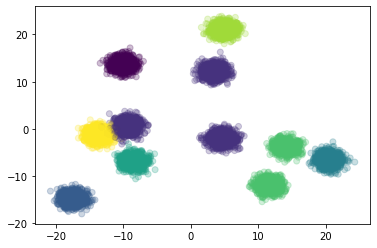

In [ ]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=test,alpha=0.25)        ### พล็อตกราฟของ new_pca โดยกำหนดสีตาม test(test คือ กลุ่มของข้อมูลจากการทำ K-mean) 

## หาว่าควรมีกี่กลุ่ม หรือ ค่า K ควรจะเป็นเท่าไหร่

จากกราฟด้านบน จะเห็นว่า k ควรมี 11 กลุ่ม

### **Elbow Method**

SSE

In [ ]:
kmeans.inertia_                      ### SSE (Sum of Squared Errors)

219019.87278668472

In [ ]:
SSE = list()                            ### หา SSE ของแต่ล่ะกลุ่ม
for k in [1,2,3,4,5,6,7,8,9,10,11,12]:
  kmeans = KMeans(n_clusters=k, random_state=1313)
  kmeans.fit(Data_dropped)
  SSE.append(kmeans.inertia_)

In [ ]:
SSE              ### ค่า SSE ของแต่ล่ะกลุ่ม

[6625518.1602167,
 5430124.163133319,
 4622355.204722752,
 3790142.8807181506,
 3033333.3859628867,
 2404273.2881047176,
 1732710.0740116707,
 1266331.880537109,
 843632.4496311974,
 499044.5255125349,
 219801.03551220635,
 219019.87278668472]

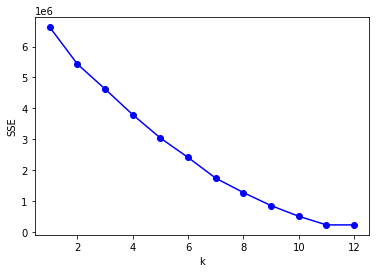

In [ ]:
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],SSE,'o-b')              ### พล็อตกราฟ k กับ SSE

plt.xlabel('k')              ### กำหนดแกน X เป็น k
plt.ylabel('SSE');           ### กำหนดแกน Y เป็น SSE

จากกราฟ ตำแหน่งที่มีการหักมุมมากที่ คือ k = 11

ดังนั้น ควรมี 11 กลุ่ม หรือ k = 11

### **Silhouette coefficient**

- จุดที่อยู่ในกลุ่มเดียวกันใกล้กันมากแค่ไหน
- จุดที่อยู่คนล่ะกลุ่มกันห่างกันมากแค่ไหน

In [ ]:
from sklearn import metrics             ### import metrics จาก sklearn

In [ ]:
SilH = list()                                    ### หาค่า Silhouette Score 
for k in [2,3,4,5,6,7,8,9,10,11,12]:                        ### Silhouette Score เป็น 1 ไม่ได้
    kmeans = KMeans(n_clusters=k, random_state=1313)
    kmeans.fit(Data_dropped)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

In [ ]:
SilH         ### ค่า Silhouette Score

[0.2306413938780372,
 0.20425714116761592,
 0.26155177924540196,
 0.34956950373306833,
 0.3841748366647043,
 0.4664285852127488,
 0.5131945634744345,
 0.6348025121973004,
 0.6857819922989067,
 0.7381197805497008,
 0.6752423388147792]

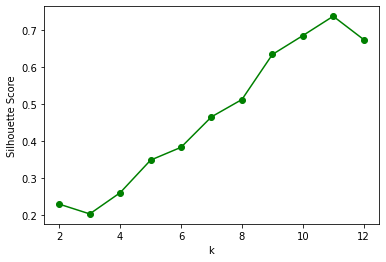

In [ ]:
plt.plot([2,3,4,5,6,7,8,9,10,11,12],SilH,'o-g')            ### พล็อตกราฟ  k กับ Silhouette Score

plt.xlabel('k')
plt.ylabel('Silhouette Score');

จากกราฟ k = 11 มีค่า Silhouette Score สูงที่สุด แสดงว่า ข้อมูลมีความใกล้กันมากในกลุ่มเดียวกันและมีความห่างกันมากของต่างกลุ่มกัน

ดังนั้น ข้อมูลชุดนี้ควรมี 8 กลุ่ม

**ดังนัน จากทั้งสองวิธี จะได้ K = 11**

In [ ]:
from sklearn.decomposition import PCA             ### import PCA จาก sklearn

pca = PCA(n_components=2)                         ### กำหนดให้มี 2 dimension

new_pca = pca.fit_transform(Data_dropped)                 ### คำนวณ PCA

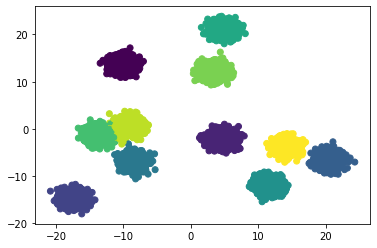

In [ ]:
kmeans = KMeans(n_clusters=11, random_state=1313)               ### พล็อตกราฟ 11 กลุ่ม
kmeans.fit(Data_dropped)
y = kmeans.predict(Data_dropped)

plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

# **3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ**

## ทำ MDS

เพื่อลดให้เหลือ 2 Dimension

In [ ]:
from sklearn.manifold import MDS        ### import MDS จาก sklearn

In [ ]:
mds = MDS(n_components=2)                   ### กำหนด components เท่ากลับ 2 กลุ่ม

In [ ]:
new_mds = mds.fit_transform(Data_dropped)        ### คำนวณระยะห่างระหว่างจุด

## หา K-mean

In [ ]:
from sklearn.cluster import KMeans    

In [ ]:
kmeans2 = KMeans(n_clusters=11)                     ### กำหนดกลุ่ม k = 11 ตามการหาค่า k ที่เหมาะสมข้างต้น 
kmeans2.fit(Data_dropped) 
P = kmeans2.predict(Data_dropped)

In [ ]:
from matplotlib import pyplot as plt   

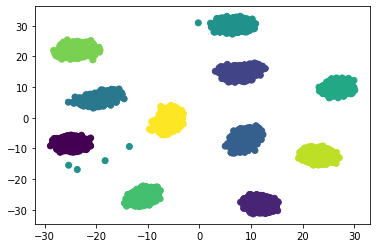

In [ ]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=P)            ### พล็อตกราฟ

# **4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.**

### กราฟ การทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ (ข้อ 2)

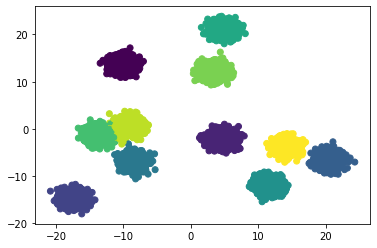

In [ ]:
kmeans = KMeans(n_clusters=11, random_state=1313)              
kmeans.fit(Data_dropped)
y = kmeans.predict(Data_dropped)

plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

### กราฟ การลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ (ข้อ 3)

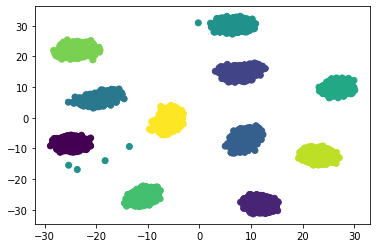

In [ ]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=P)       

**สรุปผล** 

จากทั้งสองวิธี การลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ (ข้อ 3) จะเห็นการแบ่งกลุ่มที่ชัดเจนกว่า การทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ (ข้อ 2) เล็กน้อย

ซึ่งโดยภาพรวมทั้งสองวิธีจะเห็นการแบ่งข้อมูลออกเป็นกลุ่มๆ ที่ค่อนข้างจะชัดเจน